In [185]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym 
import random as rand
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q
from scipy import integrate
from scipy.integrate import odeint

# Parcial

### 2.

In [186]:
def System(y,x):
    
    dy=x+2*y
    
    return np.array([dy])

In [187]:
def Solucion(x):
    return -x/2-(1-np.exp(2*x))/4

In [188]:
t = np.linspace(0.,4.,100)
r0 = [0.,0.]

In [189]:
respuesta= Solucion(t)
respuesta=respuesta

<IPython.core.display.Javascript object>


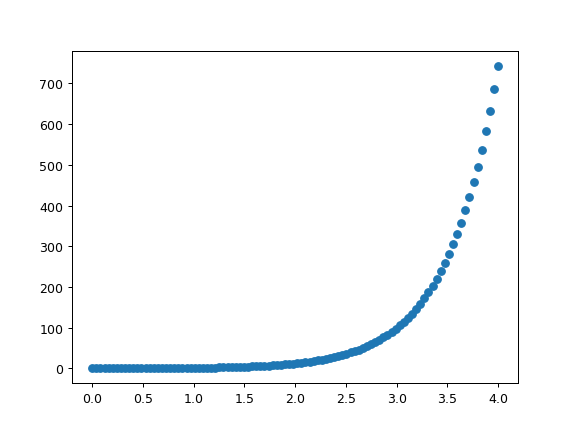

In [191]:
plt.scatter(t,respuesta)

In [199]:
def IntegratorAdams(f,r0,t):
    h = t[1] - t[0]
    
    x = np.zeros_like(t)

    y = np.zeros_like(t)
    
    
    x[0] = r0[0]
    
    y[0] = t[0]


    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    k15=np.zeros(2)
   
    for i in range(1,5):
        present = np.array(x[i-1]) 
        K11 = f(present,t[i-1])
        K12 = f(present+0.5*K11*h,t[i-1]+0.5*h)
        K13 = f(present+0.5*K12*h,t[i-1]+0.5*h)
        K14 = f(present+0.5*K13*h,t[i-1]+0.5*h)
        K15 = f(present+K14*h,t[i-1]+h)
        x[i] = x[i-1] + h*(K11[0]+2*K12[0]+2*K13[0]+K14[0]+k15[0])/6
    
       # y[i] = y[i-1] + h*(K11[1]+2*K12[1]+2*K13[1]+K14[1]+k15[1])/6 
       


    
    
    
    xc = x.copy()
    
   # yc = y.copy()
    
    for i in range(5,len(t)):
        
        present = np.array(x[i-1]) 
        past = np.array(x[i-2])
        past2=np.array(x[i-3]) 
        past3=np.array(x[i-4]) 
        past4=np.array(x[i-5])
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        K13 = f(past2,t[i-3])
        K14 = f(past3,t[i-4])
        K15=f(past4,t[i-5])
        
        x[i] = x[i-1] + h*(1901/720*K11[0] - 2774/720*K12[0] + 2616/720*K13[0] -1274/720*K14[0]+251/720*k15[0])
       # y[i] = y[i-1] + h*(1901/720*K11[1] - 2774/720*K12[1] + 2616/720*K13[1] -1274/720*K14[1]+251/720*k15[1])
        

        
        xc[i] = x[i]
       
        
      #  yc[i] = y[i]
      
        
        # Futuro
        futuro = np.array(x[i]) #np.array([x[i],y[i],vx[i],vy[i]])
        K16 = f(futuro,t[i])
        
        xc[i] = xc[i-1] + h*(475/1440*K16[0] + 1427/1440*K11[0] -798/1440*K12[0] + 482/1440*K13[0] - 173/1440*K14[0]+27/1440*k15[0])
      #  yc[i] = yc[i-1] + h*(475/1440*K16[1] + 1427/1440*K11[1] -798/1440*K12[1] + 482/1440*K13[1] - 173/1440*K14[1]+27/1440*k15[1])
        
    
    return x,xc

In [200]:
sol2 = IntegratorAdams(System,r0,t)

In [201]:
plt.scatter(t,sol2[1],marker='.',color='k')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5200\1373270376.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(respuesta-sol2[1])))


<IPython.core.display.Javascript object>


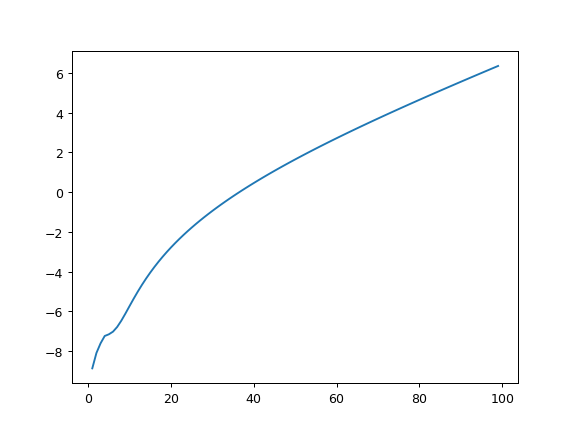

<function matplotlib.pyplot.show(*, block=None)>

In [203]:
plt.plot(np.log(np.abs(respuesta-sol2[1])))
plt.show

### 3. Particle Decay

a)

Dado que en si se toma la analogía de los tanques de agua, en A solo hay una tasa saliente de agua que está dada por la expresión de decaimiento para las partículas de A; en B hay una tasa entrante de A y una saliente hacia C, de modo que en B se tiene las partículas de A que decayeron, menos las de B que decayeron a la partícula C; y en C únicanmente hay una tasa entrante, que corresponde a la tasa de las partículas B de decayó.

De modo que el sistema de ecuaciones que se tiene es el siguiente:

$$
\frac{dN_A}{dt}=-\lambda_A N_A\\
\frac{dN_B}{dt}=\lambda_A N_A -\lambda_B N_B\\
\frac{dN_C}{dt}=\lambda_B N_B
$$

In [173]:
lambdaA=0.5
lambdaB=0.3
def System (N_i,t):
    
    N_A,N_B,N_C=N_i
    
    dNa=-lambdaA*N_A
    dNb=lambdaA*N_A-lambdaB*N_B
    dNc=lambdaB*N_B
    
    return np.array([dNa,dNb,dNc])

b)

<IPython.core.display.Javascript object>


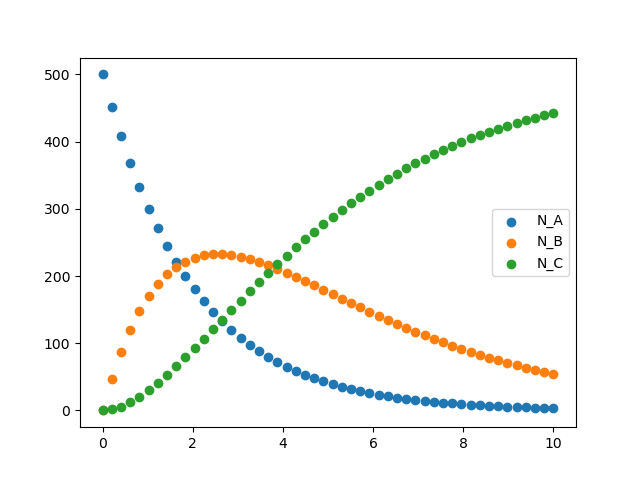

In [174]:
t=np.linspace(0,10,50)
N_i=np.array([500,0,0])
sol=odeint(System,N_i,t)
dNa=sol[:,0]
dNb=sol[:,1]
dNc=sol[:,2]

plt.scatter(t,dNa,label="N_A")
plt.scatter(t,dNb,label="N_B")
plt.scatter(t,dNc,label="N_C")
plt.legend()

c)

In [175]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [176]:
def Adaptativo(f,r0,t,e=1e-4):
    
    h=t[1]-t[0]
    
    t_=t[0]
    tf=t[-1]
    
    r=r0
    
    TimeVector=np.array([t])
    Vector=r
    Steps=np.array([h])

    while t_ < tf:
        
               
        # Avance h desde el punto actual
        r1 = Increment(f,r,t,h)
        # Avance h desde el siguiente punto
        r2 = Increment(f,r1,t+h,h)
        

    # Avance 2h desde el punto actual
        rt = Increment(f,r,t,2*h)
# El error es comparar los avances
#->h->h y ->2h en sus componentes
        error = np.linalg.norm( r2 - rt )
# Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t_ += 2*h
            r = rt
            Steps=np.append(Steps,h)
            TimeVector=np.append(TimeVector,t_)
            Vector=np.vstack((Vector,r))
            
        elif error>e:
            q = 0.85 *(e/error)**(1/4)
            h = h*q
            
            
# Llene vectores
# Si el error es muy grande, cambie el paso
# Seg´un Fehlberg
        
        
    return TimeVector, Vector, Steps


d)

In [177]:
sol_adapt=Adaptativo(System,N_i,t)
Time,Vector,Steps=sol_adapt

N_a=Vector[:,0]
N_b=Vector[:,1]
N_c=Vector[:,2]
t2=np.linspace(0,10,len(N_a))

len(N_c)

73

e)

<IPython.core.display.Javascript object>


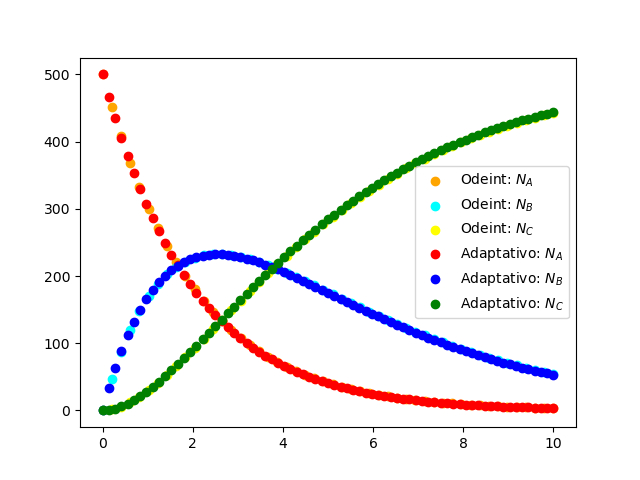

In [178]:
plt.scatter(t,dNa,label="Odeint: $N_A$",color="orange")
plt.scatter(t,dNb,label="Odeint: $N_B$",color="cyan")
plt.scatter(t,dNc,label="Odeint: $N_C$",color="yellow")
plt.scatter(t2,N_a,label="Adaptativo: $N_A$",color="red")
plt.scatter(t2,N_b,label="Adaptativo: $N_B$",color="blue")
plt.scatter(t2,N_c,label="Adaptativo: $N_C$",color="green")

plt.legend()

f)

In [179]:
tmax=0
maxi=0
for i in range(len(N_b)):
    if maxi<N_b[i]:
        maxi=N_b[i]
        tmax=t2[i]
        it=i
        
tmax

2.5

g)

In [180]:
Bmax=np.max(N_b)
Bmax     


232.35141936011607

In [181]:
Cmax=N_c[it]
Cmax

125.43914594827014